#### Keras 分类测试

In [1]:
import sys
sys.path.append("..")

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from stock_ai import ploter
from examples import get_data_np as get_data

Using TensorFlow backend.


PLEASE install TALIB to call these methods
PLEASE install TALIB to call these methods


##### 获取数据

完整数据为601398日线数据+399300日线数据

默认取3天的数据作为输入数据。第四天的数据为结果数据。以此类推。采用 `TimeseriesGenerator`

In [2]:
(x_train, y_train), (x_test, y_test) = get_data()

print(x_train.shape, 'x_train sequences')
print(y_train.shape, 'y_train sequences')
print(x_test.shape, 'x_test sequences')
print(y_test.shape, 'y_test sequences')

(2681, 3, 13) x_train sequences
(2681, 143) y_train sequences
(298, 3, 13) x_test sequences
(298, 143) y_test sequences


`x`为去掉601398的close数据后的所有数据（标准化后）

标准化采用的是`sklearn.preprocessing.MinMaxScaler`

In [3]:
x_train[0]

array([[1.        , 0.77905702, 0.26801922, 0.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        0.33333333, 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.28284815, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0517744 , 0.04922958],
       [0.53830228, 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.79255913, 0.97991569, 0.07692308, 0.08333333,
        1.        , 0.        , 0.        ]])

`y`为601398的close.pct_change()后的数据（onehot编码后）

onehot编码采用`sklearn.preprocessing.OneHotEncoder`

In [4]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [5]:
batch_size = 32
epochs = 100
num_classes = y_train.shape[1]

print('Building model...')
model = Sequential()
model.add(LSTM(512, input_shape=x_train[0].shape))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1)

Building model...
Instructions for updating:
Colocations handled automatically by placer.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 2412 samples, validate on 269 samples
Epoch 1/100
 - 4s - loss: 4.2925 - acc: 0.0858 - val_loss: 3.6529 - val_acc: 0.1301
Epoch 2/100
 - 3s - loss: 4.0173 - acc: 0.1028 - val_loss: 3.5333 - val_acc: 0.1301
Epoch 3/100
 - 3s - loss: 3.9879 - acc: 0.1024 - val_loss: 3.5773 - val_acc: 0.1301
Epoch 4/100
 - 3s - loss: 3.9664 - acc: 0.0945 - val_loss: 3.5942 - val_acc: 0.1301
Epoch 5/100
 - 4s - loss: 3.9496 - acc: 0.0978 - val_loss: 3.5984 - val_acc: 0.1301
Epoch 6/100
 - 4s - loss: 3.9382 - acc: 0.1007 - val_loss: 3.5686 - val_acc: 0.1301
Epoch 7/100
 - 4s - loss: 3.9212 - acc: 0.1007 - val_loss: 3.5881 - val_acc: 0.1301
Epoch 8/100
 - 3s - loss: 3.9110 - acc: 0.1016 - val_loss: 3.5899 - val_acc: 0.1301
Epoch 9/100
 - 3s - loss: 3.8895 - acc: 0.1041 - val_loss: 3.5871 - val_acc: 0.1301
Epoch 10/100
 - 3s - loss: 3.8692 - acc: 0.1003 - val_loss: 3.6073 - val_acc: 0.1301
Epoch 11/100
 - 3s - loss: 3.8499 - acc: 0.1078 - val_loss: 3.6049 - val_acc: 0.1301
Epoch 12/100
 - 4s - loss: 

Epoch 97/100
 - 3s - loss: 0.4189 - acc: 0.8959 - val_loss: 6.0278 - val_acc: 0.0558
Epoch 98/100
 - 3s - loss: 0.4042 - acc: 0.8910 - val_loss: 6.0613 - val_acc: 0.0706
Epoch 99/100
 - 3s - loss: 0.4019 - acc: 0.9017 - val_loss: 6.0635 - val_acc: 0.0558
Epoch 100/100
 - 3s - loss: 0.3803 - acc: 0.9017 - val_loss: 6.0633 - val_acc: 0.0595


In [6]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 512)               1077248   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 143)               73359     
_________________________________________________________________
activation_2 (Activation)    (None, 143)               0         
Total params: 1,150,607
Trainable params: 1,150,607
Non-trainable params: 0
_________________________________________________________________


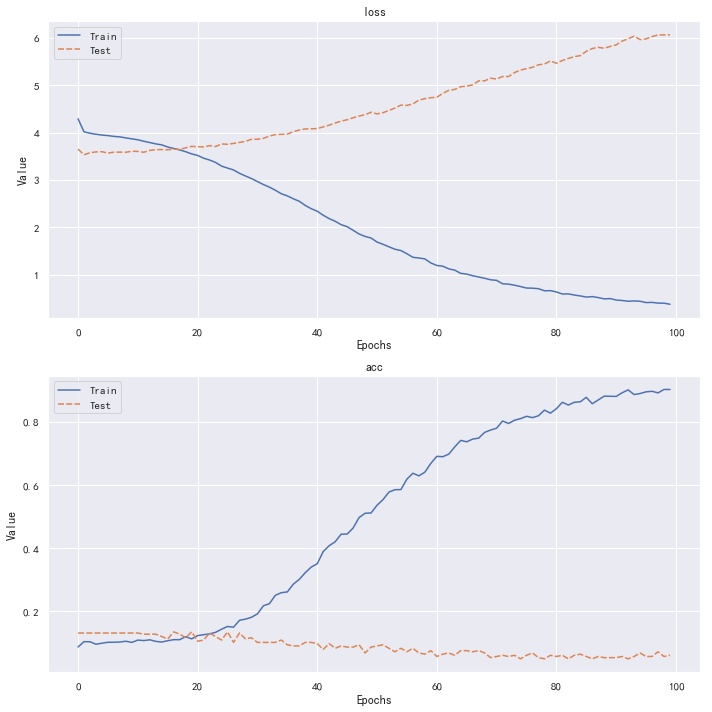

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\Anaconda3\\envs\\stock_ai\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
ploter.plot_keras_history(history)

In [8]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

298/298 [==============================] - ETA:  - ETA:  - 0s 301us/step
Test score: 7.843425673926436
Test accuracy: 0.05033557051980255
